In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
from sklearn.cluster import KMeans
import pandas as pd

In [3]:
path_photos = "C:/Users/Maria/Desktop/CV/Assignment 2/VOCdevkit/VOC2012/JPEGImages/"
path_txt = "C:/Users/Maria/Desktop/CV/Assignment 2/VOCdevkit/VOC2012/ImageSets/Main/"
all_photos = os.listdir(path_photos)
all_txt = os.listdir(path_txt)

In [4]:
print(all_txt)

['aeroplane_train.txt', 'aeroplane_trainval.txt', 'aeroplane_val.txt', 'bicycle_train.txt', 'bicycle_trainval.txt', 'bicycle_val.txt', 'bird_train.txt', 'bird_trainval.txt', 'bird_val.txt', 'boat_train.txt', 'boat_trainval.txt', 'boat_val.txt', 'bottle_train.txt', 'bottle_trainval.txt', 'bottle_val.txt', 'bus_train.txt', 'bus_trainval.txt', 'bus_val.txt', 'car_train.txt', 'car_trainval.txt', 'car_val.txt', 'cat_train.txt', 'cat_trainval.txt', 'cat_val.txt', 'chair_train.txt', 'chair_trainval.txt', 'chair_val.txt', 'cow_train.txt', 'cow_trainval.txt', 'cow_val.txt', 'diningtable_train.txt', 'diningtable_trainval.txt', 'diningtable_val.txt', 'dog_train.txt', 'dog_trainval.txt', 'dog_val.txt', 'horse_train.txt', 'horse_trainval.txt', 'horse_val.txt', 'motorbike_train.txt', 'motorbike_trainval.txt', 'motorbike_val.txt', 'person_train.txt', 'person_trainval.txt', 'person_val.txt', 'pottedplant_train.txt', 'pottedplant_trainval.txt', 'pottedplant_val.txt', 'sheep_train.txt', 'sheep_trainval.

In [5]:
new_txt = []
keywords = ("bird", "person", "aeroplane", "sofa")
for file_name in all_txt:
    for key in keywords:
        if key in file_name:
            new_txt.append(file_name)
print(new_txt)

['aeroplane_train.txt', 'aeroplane_trainval.txt', 'aeroplane_val.txt', 'bird_train.txt', 'bird_trainval.txt', 'bird_val.txt', 'person_train.txt', 'person_trainval.txt', 'person_val.txt', 'sofa_train.txt', 'sofa_trainval.txt', 'sofa_val.txt']


In [6]:
new_txt_train = []
for file_name in new_txt:
    if not "val" in file_name:
        new_txt_train.append(file_name)
print(new_txt_train)

['aeroplane_train.txt', 'bird_train.txt', 'person_train.txt', 'sofa_train.txt']


In [7]:
classes = {}
for file_name in new_txt_train:
    list_images = []
    with open(path_txt + file_name, "r") as file:
        for line in file:
            l = line.split()
            if l[1] == str(1):
                list_images.append(l[0] + ".jpg")
    classes[file_name[:-4]] = np.array(list_images)

In [8]:
images = {}
for k in classes.keys():
    images_class = classes[k]
    img = []
    for i in range(len(images_class)):
        im = cv.imread(path_photos + images_class[i], cv.IMREAD_COLOR)
        img.append(im)
    images[k] = img

In [9]:
print(images.keys())

dict_keys(['aeroplane_train', 'bird_train', 'person_train', 'sofa_train'])


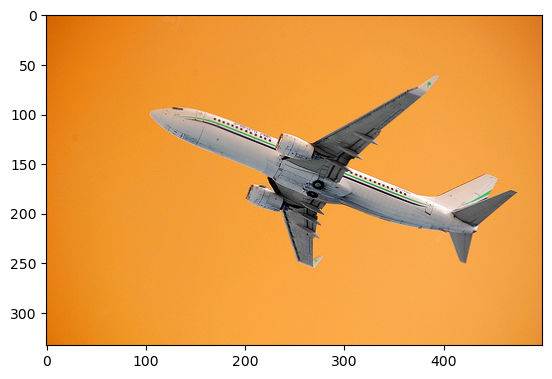

In [10]:
plt.imshow((images["aeroplane_train"][0]))

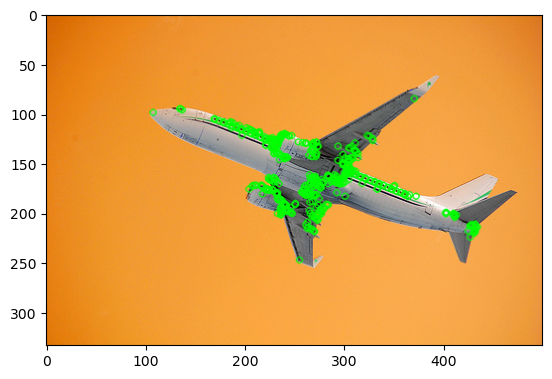

(<matplotlib.image.AxesImage at 0x2e4856cc9d0>, None)

In [11]:
img = images["aeroplane_train"][0]

orb = cv.ORB_create()
kp = orb.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

In [12]:
i = 0
for k in all_photos[:-1]:
    if image[-3:] == "jpg":
        img = cv.imread((path_photos + image), cv.IMREAD_COLOR)
        kp = orb.detect(img,None)
        kp, des = orb.compute(img, kp)
        if i == 0:
            all_des = des
        else:
            if (len(np.shape(des))) > 1:
                all_des = np.vstack([all_des, des])
        i += 1

NameError: name 'image' is not defined

In [15]:
import time
t = time.time()
for k in images.keys():
    images_class = images[k]
    for i in range(len(images_class)):
        img = images_class[i]
        kp = orb.detect(img,None)
        kp, des = orb.compute(img, kp)
        if i == 0:
            all_des = des
        else:
            if (len(np.shape(des))) > 1:
                all_des = np.vstack([all_des, des])
print(time.time()-t)

321.87889862060547


In [75]:
n_features = 100
kmeans = KMeans(n_clusters=n_features, random_state=0)
kmeans.fit(all_des)

KMeans(n_clusters=100, random_state=0)

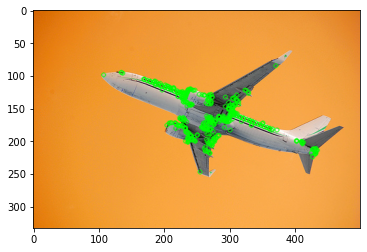

In [82]:
img = images["aeroplane_train"][0]
kp = orb.detect(img,None)
kp, des = orb.compute(img, kp)
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()
list_hist = []
for kp in des:
    list_hist.append(int(kmeans.predict(kp.reshape(1, -1))))

In [78]:
hist = np.zeros(n_features)
for i in range(n_features):
    hist[i] = (list_hist.count(i))

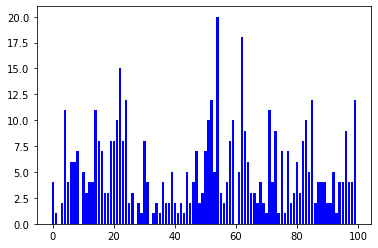

In [79]:
plt.bar(range(n_features), hist, color='b')
plt.show()

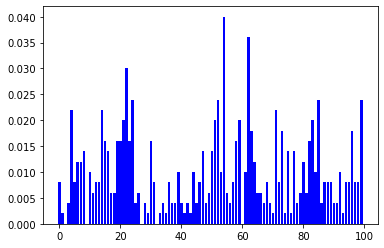

In [80]:
hist = hist/hist.sum()
plt.bar(range(n_features), hist, color='b')
plt.show()

In [210]:
def generate_histogram(img, kmeans, detector):
    kp = detector.detect(img,None)
    kp, des = detector.compute(img, kp)
    
    list_hist = kmeans.predict(des)
    hist = np.zeros(n_features)
    for i in range(100):
        hist[i] = (list_hist==i).sum()
    hist = hist/hist.sum()
    return hist

0.08345699310302734


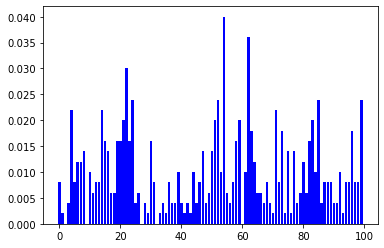

In [211]:
import time
t = time.time()
hist = generate_histogram(images["aeroplane_train"][0], kmeans, orb)
print(time.time()-t)
plt.bar(range(n_features), hist, color='b')
plt.show()

In [ ]:
dict_hist = {}
for k in images.keys():
    print("Class", k)
    im = images[k]
    list_hist = np.zeros((len(im), n_features))
    for i in range(len(im)):
        list_hist[i] = generate_histogram(im[i], kmeans, orb)
        if (i%25 == 0):
            print(i/len(im))
    dict_hist[k] = list_hist

Class aeroplane_train
0.0
0.0764525993883792
0.1529051987767584
0.22935779816513763
0.3058103975535168
0.382262996941896
0.45871559633027525
0.5351681957186545
0.6116207951070336
0.6880733944954128
0.764525993883792
0.8409785932721713
0.9174311926605505
0.9938837920489296
Class bird_train
0.0
0.06329113924050633
0.12658227848101267
0.189873417721519
0.25316455696202533
0.31645569620253167
0.379746835443038
0.4430379746835443
0.5063291139240507
0.569620253164557
0.6329113924050633
0.6962025316455697
0.759493670886076
0.8227848101265823
0.8860759493670886
0.9493670886075949
Class person_train
0.0
0.012537612838515547
0.025075225677031094
0.03761283851554664
0.05015045135406219
0.06268806419257773
0.07522567703109329
0.08776328986960882
0.10030090270812438
0.11283851554663991
0.12537612838515547
0.137913741223671
0.15045135406218657
0.1629889669007021
0.17552657973921765
0.18806419257773319
0.20060180541624875
0.2131394182547643
0.22567703109327983
0.2382146439317954
0.25075225677031093
0

In [209]:
Dataframe = pd.DataFrame()
list_keys = list(dict_hist.keys())
y = []
for k in dict_hist.keys():
    h = np.zeros(n_features)
    histograms = dict_hist[k]
    for i in range(len(histograms)):
        for j in range(100):
            h[i] = histograms[i][j]
        y.append(list_keys.index(k))
        Dataframe = pd.concat((pd.DataFrame(h.reshape(1, -1)), Dataframe))

IndexError: index 101 is out of bounds for axis 0 with size 101

In [ ]:
Dataframe.head()

In [ ]:
svm.fit(Dataframe, y)

In [ ]:
svm.score(Dataframe, y)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = svm.predict(Dataframe)
cm = confusion_matrix(y, predictions, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)

In [ ]:
disp.plot()
plt.show()

In [ ]:
print(list_keys)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(Dataframe, y)

In [ ]:
neigh.score(Dataframe, y)

In [ ]:
predictions = neigh.predict(Dataframe)
cm = confusion_matrix(y, predictions, labels=neigh.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)

In [ ]:
disp.plot()
plt.show()

# Reading test data

In [ ]:
new_txt_test = []
for file_name in new_txt:
    if not "train" in file_name:
        new_txt_test.append(file_name)

classes_test = {}
for file_name in new_txt_test:
    list_images = []
    with open(path_txt + file_name, "r") as file:
        for line in file:
            l = line.split()
            if l[1] == str(1):
                list_images.append(l[0] + ".jpg")
    classes_test[file_name[:-4]] = np.array(list_images)

In [182]:
images_test = {}
for k in classes_test.keys():
    images_class = classes_test[k]
    img = []
    for i in range(len(images_class)):
        im = cv.imread(path_photos + images_class[i], cv.IMREAD_COLOR)
        img.append(im)
    images_test[k] = img